#### ***Lecture 05***  | Edge detection - Image Prep

In [42]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [43]:
### --- Convolution ---

# Create image matrix
mat = np.uint8([1, 0, 0, 1, 1])
mat = np.tile(mat, (5, 1))
print('Original\n', mat)

# Define kernel
kernel = np.uint8([[1, 0, 1],
          [0, 0, 0],
          [0, 0, 1]])

# Apply convolution
res = cv2.filter2D(mat, 0, kernel)
print('\nFiltered\n', res)

Original
 [[1 0 0 1 1]
 [1 0 0 1 1]
 [1 0 0 1 1]
 [1 0 0 1 1]
 [1 0 0 1 1]]

Filtered
 [[0 1 2 2 3]
 [0 1 2 2 3]
 [0 1 2 2 3]
 [0 1 2 2 3]
 [0 1 2 2 3]]


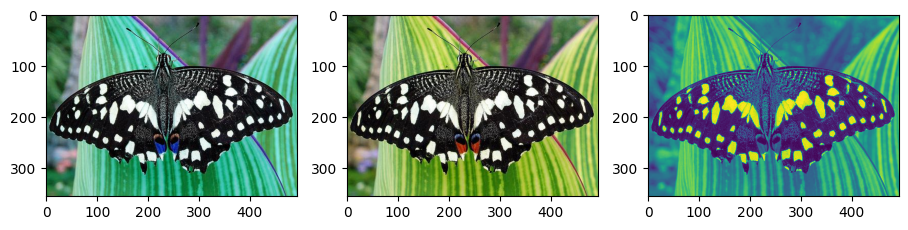

In [44]:
# Load Image
img = cv2.imread('butterfly.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display
plt.figure(figsize=(11,11))

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(img_RGB)

plt.subplot(1, 3, 3)
plt.imshow(img_gray)

plt.show()

[[1 0 1]
 [0 0 0]
 [0 0 1]]


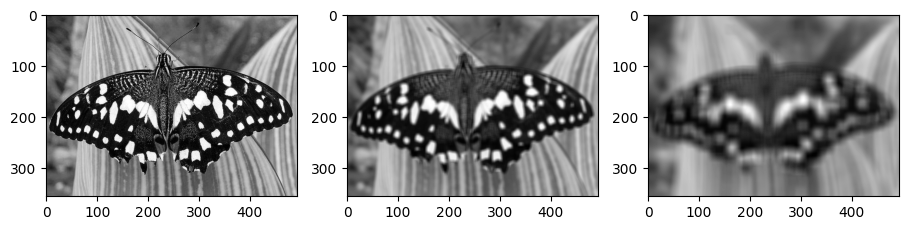

In [45]:
### --- Blurring filter ---

# Define kernel
# | ksize: 7 and 21
kernel1 = np.ones((7, 7), np.uint8) / (7**2)
kernel2 = np.ones((21, 21), np.uint8) / (21**2)
print(kernel)

# Apply kernel
res1 = cv2.filter2D(img_gray, 0, kernel1)
res2 = cv2.filter2D(img_gray, 0, kernel2)

# Display
plt.figure(figsize=(11, 11))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap= 'gray')

plt.subplot(1, 3, 2)
plt.imshow(res1, cmap= 'gray')

plt.subplot(1, 3, 3)
plt.imshow(res2, cmap= 'gray')

plt.show()


[[0.00884695]
 [0.01821591]
 [0.0335624 ]
 [0.05533504]
 [0.08163802]
 [0.10777793]
 [0.12732458]
 [0.13459835]
 [0.12732458]
 [0.10777793]
 [0.08163802]
 [0.05533504]
 [0.0335624 ]
 [0.01821591]
 [0.00884695]] 

 [[0.00884695 0.01821591 0.0335624  0.05533504 0.08163802 0.10777793
  0.12732458 0.13459835 0.12732458 0.10777793 0.08163802 0.05533504
  0.0335624  0.01821591 0.00884695]]

[[7.82685486e-05 1.61155231e-04 2.96924880e-04 4.89546366e-04
  7.22247636e-04 9.53506121e-04 1.12643438e-03 1.19078504e-03
  1.12643438e-03 9.53506121e-04 7.22247636e-04 4.89546366e-04
  2.96924880e-04 1.61155231e-04 7.82685486e-05]
 [1.61155231e-04 3.31819215e-04 6.11369425e-04 1.00797778e-03
  1.48711055e-03 1.96327263e-03 2.31933256e-03 2.45183080e-03
  2.31933256e-03 1.96327263e-03 1.48711055e-03 1.00797778e-03
  6.11369425e-04 3.31819215e-04 1.61155231e-04]
 [2.96924880e-04 6.11369425e-04 1.12643438e-03 1.85717633e-03
  2.73996767e-03 3.61728556e-03 4.27331796e-03 4.51744298e-03
  4.27331796e-03 3.6

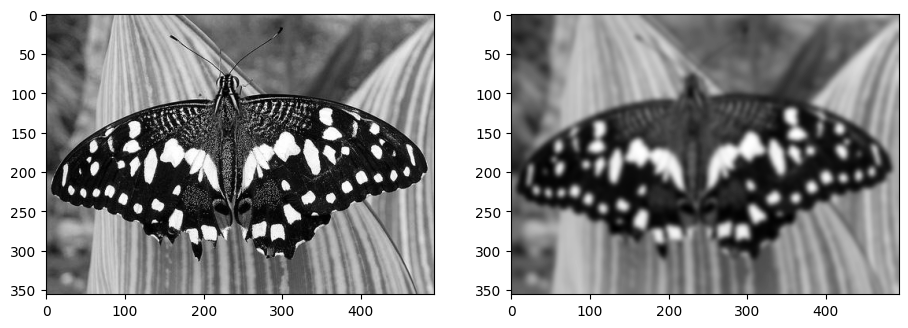

In [49]:
### --- Gaussian kernel ---

# Define kernel
# | ksize: 15
# | sigma: 3
G_X = cv2.getGaussianKernel(15, 3)
G_Y = np.transpose(G_X)
print(G_X, '\n\n', G_Y, end= '\n\n')

G_kernel = G_X * G_Y
print(G_kernel)

# Apply kernel
res = cv2.filter2D(img_gray, 0, G_kernel)

# Display
plt.figure(figsize=(11, 11))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap= 'gray')

plt.subplot(1, 2, 2)
plt.imshow(res, cmap= 'gray')


[[   1.    4.    6.    4.    1.]
 [   4.   16.   24.   16.    4.]
 [   6.   24. -476.   24.    6.]
 [   4.   16.   24.   16.    4.]
 [   1.    4.    6.    4.    1.]]


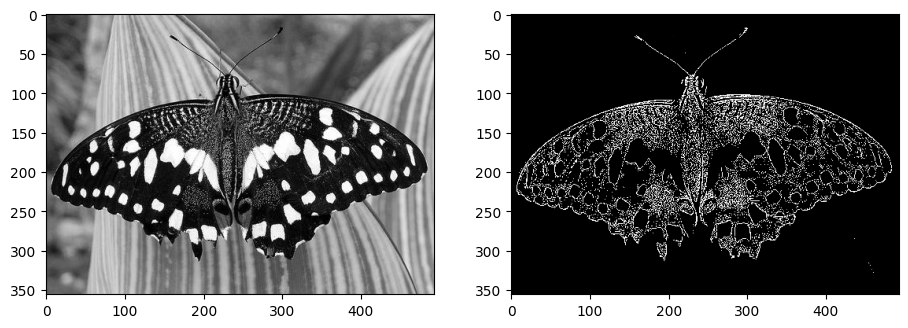

In [58]:
### --- Sharpen kernel ---

# Define kernel
kernel = np.float32([[1, 4, 6, 4, 1],
                 [4, 16, 24, 16, 4],
                 [6, 24, -476, 24, 6],
                 [4, 16, 24, 16, 4],
                 [1, 4, 6, 4, 1]])
print(kernel)

# Apply kernel
img_ShpKer = cv2.filter2D(img_gray, -1, kernel)

# Display
plt.figure(figsize= (11, 11))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap= 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img_ShpKer, cmap= 'gray')

plt.show()

#### ***Lecture 05***  | Edge detection - Functions

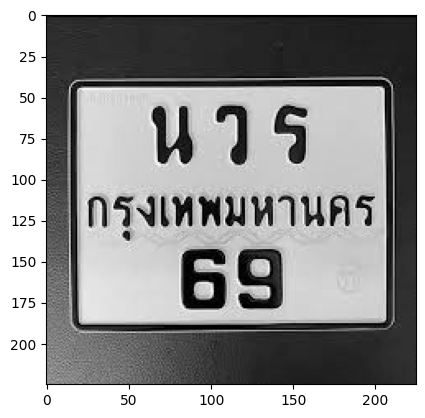

In [63]:
# Load image
img = cv2.imread('69.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap= 'gray')


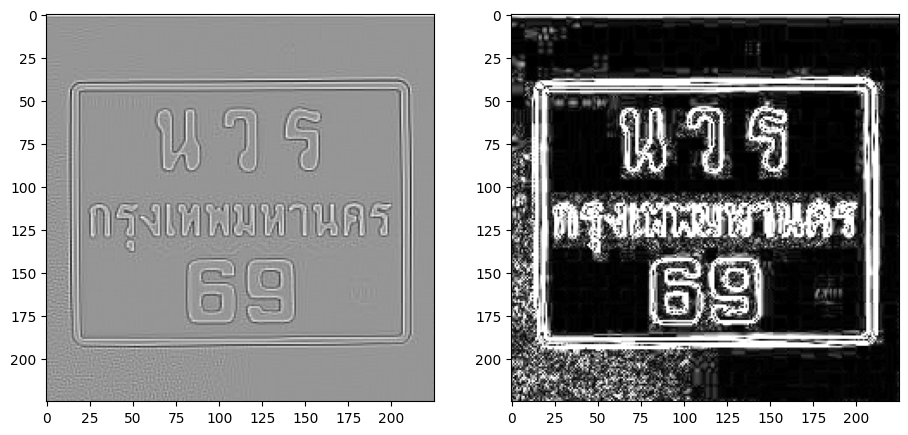

In [68]:
### --- Laplacian ---

# Apply kernel
# | laplacirn matrix -> [0,  1,  0]
#                       [1, -4,  1]
#                       [0,  1,  0]
res = cv2.Laplacian(img, cv2.CV_64F, ksize= 3)

# Rescale the value fo the pixel to [0, 255] 
cvt = cv2.convertScaleAbs(res)

# Display
plt.figure(figsize=(11, 11))

plt.subplot(1, 2, 1)
plt.imshow(res, cmap= 'gray')

plt.subplot(1, 2, 2)
plt.imshow(cvt, cmap= 'gray')

plt.show()